### About Lesson
Data wrangling, also known as data munging, is the process of cleaning, transforming, and organizing data in a way that makes it more suitable for analysis. It is a crucial step in the data science process as real-world data is often messy and inconsistent.

 

The general steps to do Data Wrnagling in python are as follows:

Steps to perform data wrangling on the Titanic dataset in Python using pandas library: The steps of data wrangling in Python typically include:

1. Importing necessary libraries such as Pandas, NumPy, and Matplotlib
2. Loading the data into a Pandas DataFrame
3. Assessing the data for missing values, outliers, and inconsistencies
4. Cleaning the data by filling in missing values, removing outliers, and correcting errors
5. Organizing the data by creating new columns, renaming columns, sorting, and filtering the data
6. Storing the cleaned data in a format that can be used for future analysis, such as a CSV or Excel file
7. Exploring the data by creating visualizations and using descriptive statistics
8. Creating a pivot table to summarize the data
9. Checking for and handling duplicate rows
10. Encoding categorical variables
11. Removing unnecessary columns or rows
12. Merging or joining multiple datasets
13. Handling missing or null values
14. Reshaping the data
15. Formatting the data
16. Normalizing or scaling the data
17. Creating new features from existing data
18. Validating data integrity
19. Saving the final data for future use
20. Documenting the data wrangling process for reproducibility
Please note that the steps may vary depending on the data, the requirements, and the goals of the analysis. It’s worth noting that these are general steps and the specific steps you take will depend on the dataset you are working with and the analysis you plan to perform.


 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [85]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [86]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
# cleaning data
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

step3 (1). dealing with missing values

In [90]:
# as we can see 77% values in deck column are missing so we will drop this column
df = df.drop(columns=['deck'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [92]:
# in age columns 20% values are missing so we will fill these values with mean
df['age'] = df['age'].fillna(df['age'].mean())

In [93]:
df.isnull().sum()/len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [94]:
# in embark column only 0.22% values are missing so we will drop these rows
df = df.dropna()

In [95]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

now we have very well handled missing values, let's check the duplicates

survived       Axes(0.125,0.653529;0.227941x0.226471)
pclass      Axes(0.398529,0.653529;0.227941x0.226471)
age         Axes(0.672059,0.653529;0.227941x0.226471)
sibsp          Axes(0.125,0.381765;0.227941x0.226471)
parch       Axes(0.398529,0.381765;0.227941x0.226471)
fare        Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

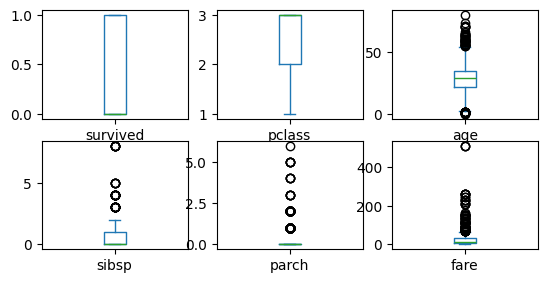

In [96]:
# step3-2-1. checking for outliers
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)


<Axes: ylabel='count'>

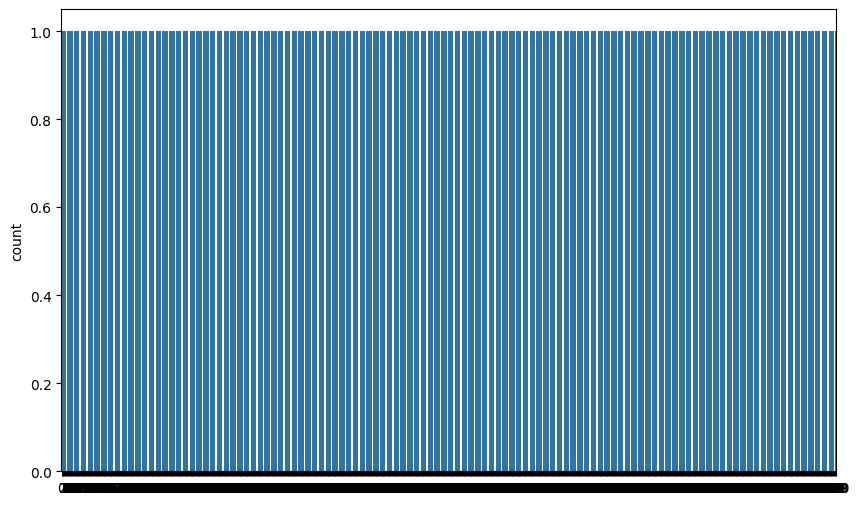

In [97]:
# step 3-2-1-1. visualizing the data
plt.figure(figsize=(10,6))
sns.countplot(df['survived'])


<Axes: xlabel='sex', ylabel='age'>

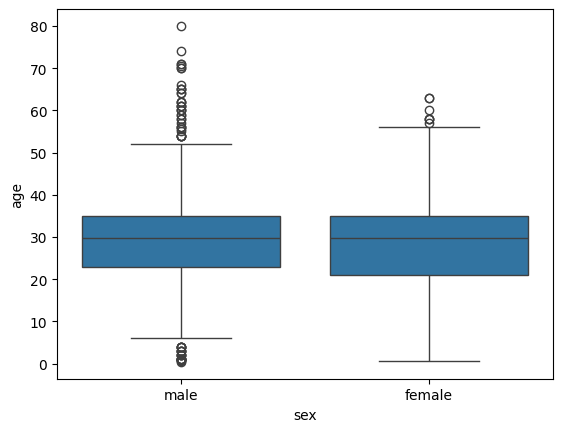

In [98]:
sns.boxplot(y='age',x='sex', data=df)

In [99]:
#find outlier using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


13.0


In [100]:
# now handle these  outlier
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) |(df['age'] > (Q3 + 1.5 * IQR)))]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     824 non-null    int64   
 1   pclass       824 non-null    int64   
 2   sex          824 non-null    object  
 3   age          824 non-null    float64 
 4   sibsp        824 non-null    int64   
 5   parch        824 non-null    int64   
 6   fare         824 non-null    float64 
 7   embarked     824 non-null    object  
 8   class        824 non-null    category
 9   who          824 non-null    object  
 10  adult_male   824 non-null    bool    
 11  embark_town  824 non-null    object  
 12  alive        824 non-null    object  
 13  alone        824 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.8+ KB


In [102]:
df.shape

(824, 14)

In [103]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [104]:
# reomove outliers from fare column fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)  
# now handle these  outlier
df = df[~((df['fare'] < (Q1 - 1.5 * IQR)) |(df['fare'] > (Q3 + 1.5 * IQR)))]


22.121899999999997


In [105]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

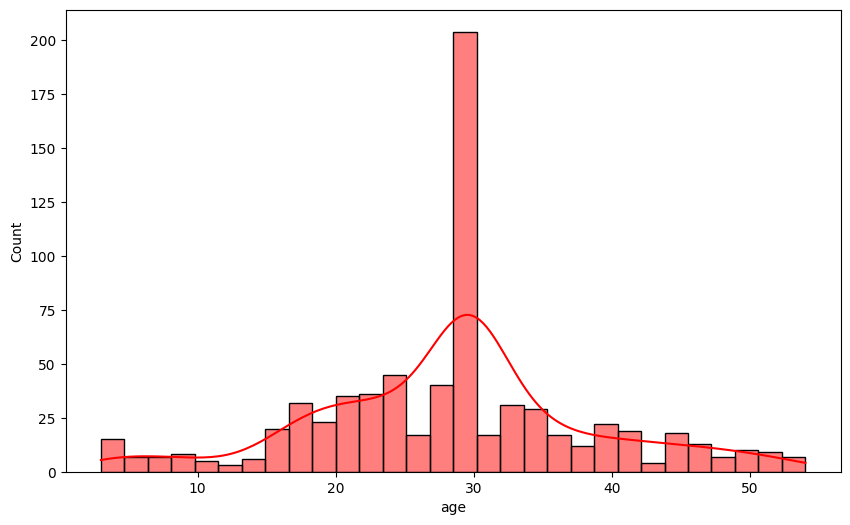

In [106]:
# as we have cleaned data, data has been normalized and scaled
# plot the data
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='red', bins=30)

In [107]:
# apply shapiro test on age column
from scipy.stats import shapiro
stat, p = shapiro(df['age'])
print(stat, p)
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
      print('Sample does not look Gaussian (reject H0)')
      

0.9670128667207224 1.2178629284029216e-11
Sample does not look Gaussian (reject H0)


In [108]:
# APPLY Z-SCORE ON AGE COLUMN
from scipy.stats import zscore
z_scores = zscore(df['age'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  5,  10,  24,  26,  31,  76,  90, 104, 107, 123, 124, 125, 127,
       131, 132, 137, 144, 152, 153, 159, 161, 166, 171, 178, 182, 193,
       205, 209, 211, 214, 221, 224, 235, 252, 255, 264, 267, 268, 273,
       276, 287, 289, 313, 316, 322, 329, 347, 349, 353, 361, 368, 370,
       372, 373, 389, 410, 412, 419, 421, 422, 423, 430, 444, 447, 456,
       462, 466, 469, 473, 478, 480, 484, 490, 500, 506, 513, 528, 529,
       534, 536, 543, 555, 556, 558, 563, 564, 565, 569, 571, 579, 591,
       609, 617, 619, 636, 637, 645, 647, 650, 657, 678, 684, 686, 689,
       691, 693, 699, 701, 712]),)
Number of outliers is: 109
The score threshold is: 2
The indices of the outliers:
(array([  5, 124, 127, 144, 182, 205, 211, 255, 322, 349, 361, 368, 389,
       410, 422, 456, 466, 478, 480, 506, 555, 571, 579, 619, 637, 686]),)
Number of outliers is: 26
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64

In [109]:
# APPLY THRESHOLD VALUE 2
df = df[(np.abs(zscore(df['age'])) < 2)]
print(df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
5           0       3    male  29.699118      0      0   8.4583        Q   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male  embark_town alive  alone  
0     Third    man        Tr

In [110]:
# APPLY Z-SCORE ON FARE COLUMN
z_scores = zscore(df['fare'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    

The score threshold is: 1
The indices of the outliers:
(array([  2,   6,   8,  16,  17,  23,  39,  42,  51,  53,  61,  64,  69,
        83,  91, 105, 112, 114, 127, 130, 137, 138, 158, 188, 198, 200,
       203, 222, 229, 241, 247, 256, 261, 273, 280, 306, 324, 339, 343,
       354, 358, 376, 381, 388, 399, 400, 401, 410, 427, 430, 431, 441,
       445, 450, 451, 452, 461, 467, 473, 476, 495, 496, 497, 503, 506,
       507, 508, 511, 512, 525, 527, 535, 546, 549, 554, 565, 576, 577,
       584, 597, 604, 611, 619, 620, 623, 628, 630, 641, 644, 659, 661]),)
Number of outliers is: 91
The score threshold is: 2
The indices of the outliers:
(array([  2,  23,  42,  51,  53,  61,  69,  83, 105, 127, 130, 138, 188,
       229, 241, 261, 273, 280, 339, 354, 358, 376, 388, 399, 427, 445,
       461, 476, 495, 497, 503, 506, 511, 512, 525, 527, 535, 554, 576,
       597, 611, 619, 641, 644]),)
Number of outliers is: 44
The score threshold is: 3
The indices of the outliers:
(array([ 53,  69, 130, 

In [111]:
# APPLY THRESHOLD VALUE 3
df = df[(np.abs(zscore(df['fare'])) < 3)]
print(df)


     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
5           0       3    male  29.699118      0      0   8.4583        Q   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male  embark_town alive  alone  
0     Third    man        Tr

<Axes: xlabel='age', ylabel='Count'>

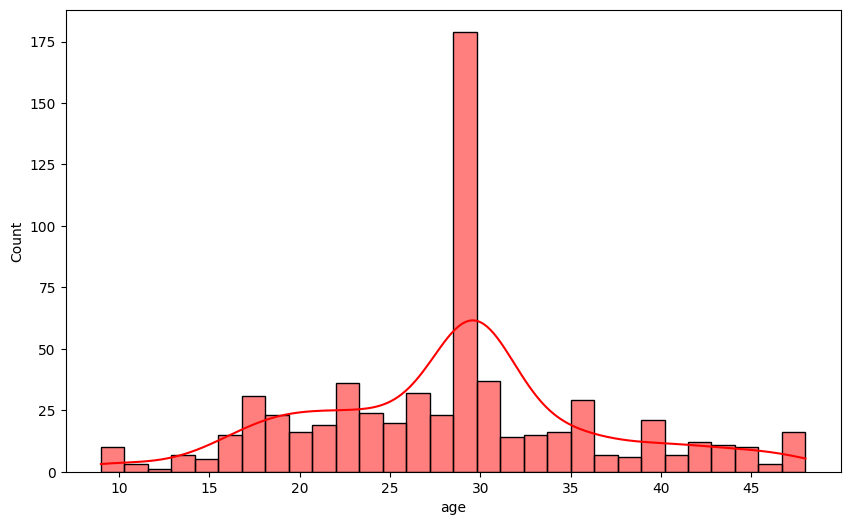

In [112]:
# HIST PLOT AGE AND FARE
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='red', bins=30)



<Axes: xlabel='fare', ylabel='Count'>

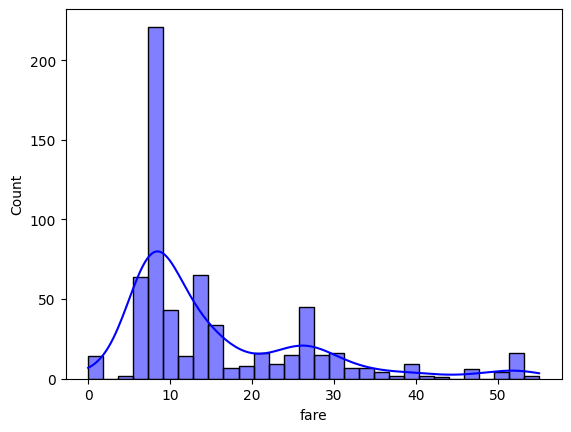

In [113]:
sns.histplot(df['fare'], kde=True, color='blue', bins=30)

In [114]:
# APPLY SHAPIRO TEST ON AGE COLUMN
from scipy.stats import shapiro
stat, p = shapiro(df['age'])
print(stat, p)
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
      print('Sample does not look Gaussian (reject H0)')
      

0.9683271331620285 1.285243242216812e-10
Sample does not look Gaussian (reject H0)


In [115]:
# step(3)2.  correcting erros in data
 
# checking for duplicate values
df.duplicated().sum()

np.int64(100)

In [116]:
df.shape

(648, 14)

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.shape

(548, 14)

In [124]:
# we have directly removed duplicate values from the dataset  without checking the columns
# we can also check duplicate values based on columns
df1=df.duplicated()

In [125]:
df1.shape

(548,)

In [126]:
# apply shapiro test on age column
from scipy.stats import shapiro
stat, p = shapiro(df['age'])
print(stat, p)
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
      print('Sample does not look Gaussian (reject H0)')

0.9793233261329845 5.276692547757294e-07
Sample does not look Gaussian (reject H0)


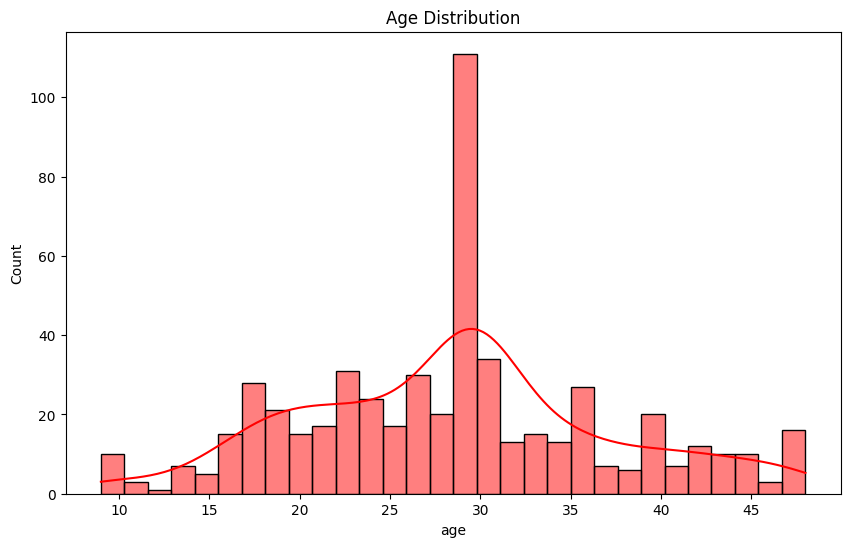

In [127]:
# draw hist plot of age column
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='red', bins=30)
plt.title('Age Distribution')
plt.show()

### data Normalization

In [130]:
!pip install scikit-learn

In [ ]:
#  methods to data normalization and scaling
# 1. Min-Max Normalization
# 2. Z-Score Normalization
# 3. Robust Normalization
# 4. Decimal Scaling
# 5. Standardization
# 6. Log Scaling  
# 7. Cube Root Normalization
# 8. Exponential Normalization
# 9. Sigmoid Normalization
# 10. Power Normalization

